In [1]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [67]:
kota = str(input("Masukkan nama kota : "))

c = {"aceh" : 50, "medan" : 150, "pekanbaru" : 100, "padang" : 50, "jambi" : 50}
pasar = pd.read_csv("Data/bersih/{}_pasar_bersih.csv".format(kota)).drop(columns=["Unnamed: 0", "Subtitle"])
perumahan = pd.read_csv("Data/bersih/{}_perumahan_bersih.csv".format(kota)).drop(columns=["Unnamed: 0", "Subtitle"])
apartemen = pd.read_csv("Data/bersih/{}_apartemen_bersih.csv".format(kota)).drop(columns=["Unnamed: 0", "Subtitle"])

Masukkan nama kota : padang


# Clustering

In [68]:
df = pasar[["Latitude", "Longitude"]]
df.head()

,Latitude,Longitude
0,-0.928366,100.351353
1,-0.928366,100.351353
2,-0.937092,100.351088
3,-0.897617,100.418940
4,-0.922161,100.406410


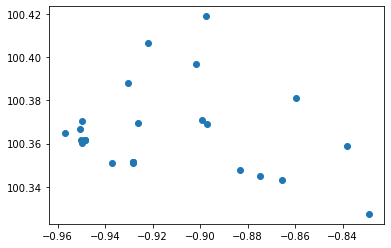

In [69]:
plt.scatter(df["Latitude"], df["Longitude"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


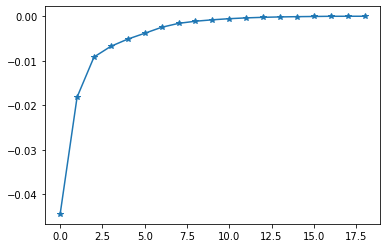

In [70]:
scr = []
for i in range(1,20):
    score = KMeans(n_clusters = i).fit(df).score(df)
    scr.append(score)
plt.plot(scr, marker = "*")

In [71]:
jclaster = math.ceil(c[kota]/7)

kmeans = KMeans(n_clusters = jclaster)
kmeans.fit(df)
kmeans.labels_

array([0, 0, 0, 7, 2, 0, 3, 3, 3, 4, 0, 3, 0, 1, 1, 4, 6, 5, 3, 3, 5, 3,
       3, 2, 1, 7])

In [72]:
# Membuat tabel yang akan diolah jarak dari tiap tiap titik

c = []
for i in range(jclaster):
    c.append("Cluster ke {}".format(i+1))

centers = kmeans.cluster_centers_

Tabel = pd.DataFrame(c, columns = ["Nama Cluster"])
Tabel["Latitude"] = centers[:,0]
Tabel["Longitude"] = centers[:, 1]
Tabel

,Nama Cluster,Latitude,Longitude
0,Cluster ke 1,-0.929398,100.354298
1,Cluster ke 2,-0.874572,100.345312
2,Cluster ke 3,-0.926309,100.397140
3,Cluster ke 4,-0.950396,100.363541
4,Cluster ke 5,-0.898106,100.369996
5,Cluster ke 6,-0.848812,100.370063
6,Cluster ke 7,-0.828891,100.327447
7,Cluster ke 8,-0.899608,100.407834


In [73]:
dfx = df[["Latitude", "Longitude"]]
dfx

,Latitude,Longitude
0,-0.928366,100.351353
1,-0.928366,100.351353
2,-0.937092,100.351088
3,-0.897617,100.418940
4,-0.922161,100.406410
5,-0.928113,100.351203
6,-0.948470,100.361468
7,-0.948470,100.361468
8,-0.957142,100.364695
9,-0.899064,100.370765


In [74]:
dfx["Cluster"] = kmeans.labels_
dfx

,Latitude,Longitude,Cluster
0,-0.928366,100.351353,0
1,-0.928366,100.351353,0
2,-0.937092,100.351088,0
3,-0.897617,100.418940,7
4,-0.922161,100.406410,2
5,-0.928113,100.351203,0
6,-0.948470,100.361468,3
7,-0.948470,100.361468,3
8,-0.957142,100.364695,3
9,-0.899064,100.370765,4


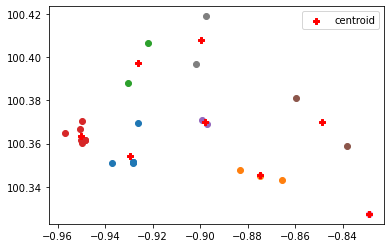

In [75]:
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i in range(jclaster):
    df0 = dfx[dfx["Cluster"] == i]
    plt.scatter(df0["Latitude"], df0["Longitude"], color = color[i])

# df0 = dfx[dfx["Cluster"] == 0]
# df1 = dfx[dfx["Cluster"] == 1]
# df2 = dfx[dfx["Cluster"] == 2]
# plt.scatter(df0["Latitude"], df0["Longitude"], color = 'g')
# plt.scatter(df1["Latitude"], df1["Longitude"], color = 'purple')
# plt.scatter(df2["Latitude"], df2["Longitude"], color = 'y')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='r',marker='P',label='centroid')
plt.legend()

# Menghitung jarak relatif terhadap titik cluster

In [76]:
Tabel

,Nama Cluster,Latitude,Longitude
0,Cluster ke 1,-0.929398,100.354298
1,Cluster ke 2,-0.874572,100.345312
2,Cluster ke 3,-0.926309,100.397140
3,Cluster ke 4,-0.950396,100.363541
4,Cluster ke 5,-0.898106,100.369996
5,Cluster ke 6,-0.848812,100.370063
6,Cluster ke 7,-0.828891,100.327447
7,Cluster ke 8,-0.899608,100.407834


In [78]:
def hitung(lat1, lng1, lat2, lng2):
    rbumi = 6371 # jari jari bumi (km)
    # menghitung jarak dua titik
    dlat = math.radians(lat2 -lat1)
    dlon = math.radians(lng2-lng1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
            * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = rbumi * c

    return d

In [79]:
# Mencari jarak dari pasar ke titik tengah cluster

j_CP = []
for i in range(len(pasar)):
    j_CP.append([])

for i in range(len(pasar)):
    lat2 = pasar["Latitude"][i]
    lng2 = pasar["Longitude"][i]
    for j in range(len(Tabel)):
        lat1 = Tabel["Latitude"][j]
        lng1 = Tabel["Longitude"][j]
        j_CP[i].append(hitung(lat1, lng1, lat2, lng2))


In [80]:
# Mencari jarak dari apatemen ke titik tengah cluster

j_CA = []
for i in range(len(apartemen)):
    j_CA.append([])

for i in range(len(apartemen)):
    lat2 = apartemen["Latitude"][i]
    lng2 = apartemen["Longitude"][i]
    for j in range(len(Tabel)):
        lat1 = Tabel["Latitude"][j]
        lng1 = Tabel["Longitude"][j]
        j_CA[i].append(hitung(lat1, lng1, lat2, lng2))


In [81]:
# Mencari jarak dari perumahan ke titik tengah cluster

j_CPR = []
for i in range(len(perumahan)):
    j_CPR.append([])

for i in range(len(perumahan)):
    lat2 = perumahan["Latitude"][i]
    lng2 = perumahan["Longitude"][i]
    for j in range(len(Tabel)):
        lat1 = Tabel["Latitude"][j]
        lng1 = Tabel["Longitude"][j]
        j_CPR[i].append(hitung(lat1, lng1, lat2, lng2))


In [82]:

for x in range(len(j_CP)):
    Tabel["Jarak TC ke pasar {} (km)".format(x+1)] = j_CP[x]
for y in range(len(j_CA)):
    Tabel["Jarak TC ke apartemen {} (km)".format(y+1)] = j_CA[y]
for z in range(len(j_CPR)):
    Tabel["Jarak TC ke perumahan {} (km)".format(z+1)] = j_CPR[z]
Tabel

,Nama Cluster,Latitude,Longitude,Jarak TC ke pasar 1 (km),Jarak TC ke pasar 2 (km),Jarak TC ke pasar 3 (km),Jarak TC ke pasar 4 (km),Jarak TC ke pasar 5 (km),Jarak TC ke pasar 6 (km),Jarak TC ke pasar 7 (km),...,Jarak TC ke perumahan 203 (km),Jarak TC ke perumahan 204 (km),Jarak TC ke perumahan 205 (km),Jarak TC ke perumahan 206 (km),Jarak TC ke perumahan 207 (km),Jarak TC ke perumahan 208 (km),Jarak TC ke perumahan 209 (km),Jarak TC ke perumahan 210 (km),Jarak TC ke perumahan 211 (km),Jarak TC ke perumahan 212 (km)
0,Cluster ke 1,-0.929398,100.354298,0.347011,0.347011,0.927056,8.008793,5.849434,0.372620,2.265623,...,342.190680,341.076567,902.151358,2213.234349,1853.913325,1853.219668,2212.087929,1852.894980,532.226263,1853.575757
1,Cluster ke 2,-0.874572,100.345312,6.019143,6.019143,6.981517,8.577793,8.610812,5.989312,8.411124,...,336.013040,334.898912,904.622575,2214.869181,1857.677781,1856.978155,2213.720703,1856.651572,526.174007,1857.333001
2,Cluster ke 3,-0.926309,100.397140,5.095771,5.095771,5.258606,4.006699,1.129154,5.111205,4.669195,...,342.643991,341.536344,897.616445,2208.532808,1849.877880,1849.181109,2207.386098,1848.855434,533.616590,1849.536551
3,Cluster ke 4,-0.950396,100.363541,2.799425,2.799425,2.026089,8.507616,5.707306,2.832122,0.314529,...,344.660071,343.546810,900.588384,2211.970792,1851.906053,1851.214319,2210.825140,1850.890242,534.773855,1851.570808
4,Cluster ke 5,-0.898106,100.369996,3.951966,3.951966,4.817950,5.441917,4.852343,3.936816,5.679967,...,339.041561,337.930553,901.313818,2211.862870,1854.020843,1853.322442,2210.715189,1852.996249,529.601292,1853.677543
5,Cluster ke 6,-0.848812,100.370063,9.087218,9.087218,10.040422,7.679991,9.102314,9.063636,11.122574,...,333.638946,332.529227,902.679203,2212.440126,1856.617323,1855.913044,2211.290566,1855.584985,524.494475,1856.266918
6,Cluster ke 7,-0.828891,100.327447,11.375979,11.375979,12.315253,12.723171,13.588171,11.344711,13.824203,...,330.683836,329.568125,907.824347,2217.390114,1861.838710,1861.134799,2216.239973,1860.806855,520.720038,1861.488750
7,Cluster ke 8,-0.899608,100.407834,7.046968,7.046968,7.561615,1.254473,2.512867,7.049085,7.489640,...,339.929731,338.824448,897.197010,2207.661885,1850.237870,1849.537217,2206.514109,1849.210311,531.286537,1849.891851


In [83]:
Tabel.to_csv("Data/jarak/{}_jarakFIX.csv".format(kota))